# Correlation

*  r coefficient the degree to which X and Y vary together, relative to the degree to which X and Y vary independently

* r = covariance(X,Y) / Variance(X,Y)

$$ r = \frac{cov(A,B)}{\sigma_A * \sigma_B} $$
where $S_A$ and $S_B$ are standard deviations of X and Y

$$\sigma(X) = \sqrt{\frac{\sum(x_i - \bar{x})^2}{N-1}}$$

$$cov(X,Y) = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{N-1}$$ where N is a length of X and Y vector

In [38]:
## calculations on simplest data
A <- 1:3
B <- c(3,6,7)
diff_A <- A - mean(A)
diff_B <- B - mean(B)

covar <- sum ( diff_A * diff_B ) / (length(A)-1)
covar

[1] 2

In [39]:
sd_A <- sqrt(sum(diff_A^2)/(length(diff_A)-1))
sd_B <- sqrt(sum(diff_B^2)/(length(diff_B)-1))
correlation <- covar / (sd_A * sd_B)
correlation

[1] 0.9607689

In [40]:
##using R cor function
cor(A,B)

[1] 0.9607689

Correlation values: 
* 1  X,Y  perfectly correlated
* -1, X,Y  perfectly negatively correlated
* 0   X,Y  uncorrelated

### data exploratory analsys

dataset of individuals who have been exercising. They are of difference age, with different number of years exercising, their endurance is measured

In [41]:
#load data 
PE<-read.csv(file="health.csv",header=T)

In [42]:
str(PE)
head(PE)

'data.frame':	200 obs. of  4 variables:
 $ pid        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age        : int  60 40 29 47 48 42 55 43 39 51 ...
 $ activeyears: int  10 9 2 10 9 6 8 19 9 14 ...
 $ endurance  : int  18 36 51 18 23 30 8 40 28 15 ...


,pid,age,activeyears,endurance
1,1,60,10,18
2,2,40,9,36
3,3,29,2,51
4,4,47,10,18
5,5,48,9,23
6,6,42,6,30


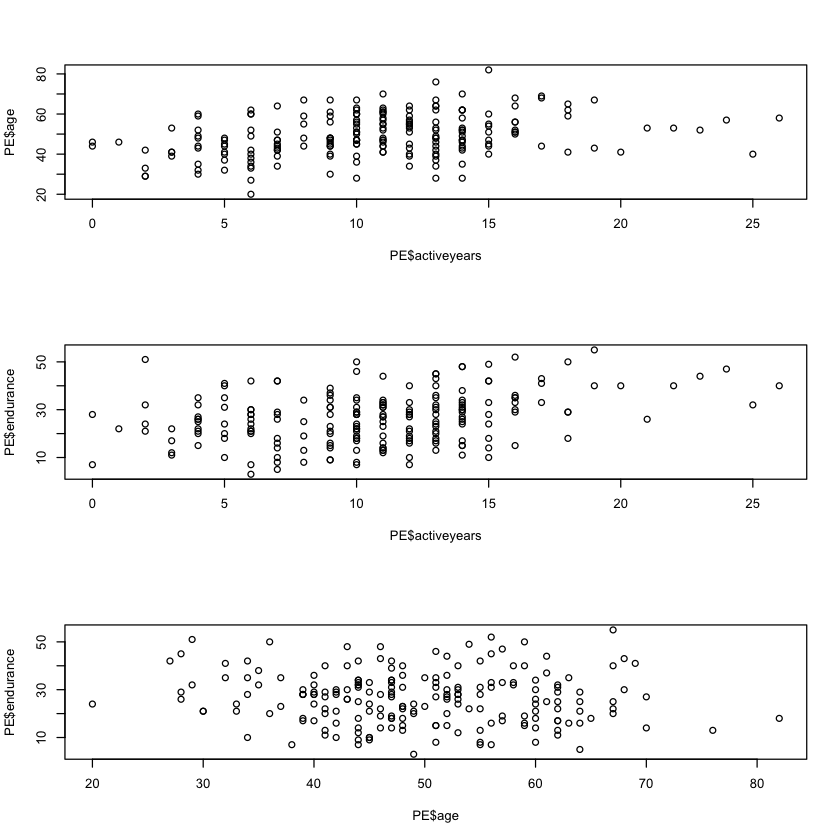

In [43]:
##show scatter plots of varianles except pid
par(mfrow=c(3,1))
plot(PE$age~PE$activeyears)
plot(PE$endurance~PE$activeyears)
plot(PE$endurance~PE$age)
par(mfrow=c(1,1))

In [44]:
#compute correlation rounded to 2 digits of PE variables except pid
print(round(cor(PE[,2:4]), 2))

              age activeyears endurance
age          1.00        0.33     -0.08
activeyears  0.33        1.00      0.33
endurance   -0.08        0.33      1.00


In [45]:
cor.test(PE$age, PE$activeyears)
cor.test(PE$age, PE$endurance)  # p-value shows that these are not correlated
cor.test(PE$endurance, PE$activeyears)


	Pearson's product-moment correlation

data:  PE$age and PE$activeyears
t = 4.9022, df = 198, p-value = 1.969e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1993491 0.4473145
sample estimates:
      cor 
0.3289909 



	Pearson's product-moment correlation

data:  PE$age and PE$endurance
t = -1.1981, df = 198, p-value = 0.2323
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.22097811  0.05454491
sample estimates:
        cor 
-0.08483813 



	Pearson's product-moment correlation

data:  PE$endurance and PE$activeyears
t = 4.8613, df = 198, p-value = 2.37e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1967110 0.4451154
sample estimates:
      cor 
0.3265402 


### correlation does not imply causation

 * the two variables are just related
 
 * i.e sleeping in boots is correlated to having a headache next morning. But does not cause it.  the probable cause is getting drunk
 
 The magnitude of a correlation is influenced by:
* measurement of x & y
* several other assumptions
     
Random and representative sampling

* measure IQ in a sample of general population vs measure IQ in a sample of colledge graduates
    * restricting a sample to specific group decreases its variance
    
#### a correlation coefficient is a sample statistics ( just like the mean)
* It may not be representative of all subjects in the sample 

#### impact dataset

This dataset investigates the effects of a sports-related concussion and involves the survey data of a control group and a group of athletes who suffered from a concussion. We are interested in the following variables of the dataset:

* vermem2: verbal memory after impact,
* vismem2: visual memory after impact,
* vms2: visual motor Speed after impact,
* rt2: reaction time after impact,
* ic2: impulse control after impact, and
* sym2: symptom score after impact.


In [2]:
#create impact dataset
subject<-1:40
condition<-c('control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','control','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed','concussed')
vermem1<-c(95,90,87,84,92,89,78,97,93,90,89,97,79,86,85,85,98,95,96,92,79,85,97,89,75,75,84,93,88,97,93,96,84,89,95,95,97,95,92,95)
vismem1<-c(88,82,77,72,77,79,63,82,85,66,76,79,60,59,60,76,85,83,67,84,81,85,91,74,63,68,78,74,80,73,74,70,81,72,90,74,70,63,65,69)
vms1 <- c(35.29,31.47,30.87,41.87,33.28,40.73,38.09,31.65,39.59,30.53,33.65,37.51,40.39,32.88,33.39,35.13,38.51,29.64,35.32,27.36,27.19,32.66,26.29,28.92,32.77,32.92,34.26,36.08,31.63,28.89,35.81,33.61,34.46,39.18,33.14,33.03,39.01,35.06,30.58,38.45)
rt1 <- c(0.42,0.63,0.56,0.66,0.56,0.81,0.66,0.79,0.68,0.6,0.74,0.51,0.82,0.59,0.82,0.63,0.73,0.57,0.65,1,0.57,0.71,0.82,0.61,0.72,0.5,0.54,0.65,0.66,0.71,0.55,0.79,0.48,0.55,1.2,0.73,0.6,0.84,0.6,0.42)
ic1 <- c(11,7,8,7,7,6,6,10,7,10,7,7,12,2,9,10,10,8,5,11,7,9,9,9,8,9,6,10,9,7,9,7,7,10,10,11,10,5,8,11)
sym1 <-c(0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0)
vermem2 <-c(97,86,90,85,87,91,90,94,91,93,92,89,84,81,85,87,96,93,95,93,63,79,91,85,74,72,80,59,75,90,66,85,72,82,80,59,74,62,67,66)
vismem2 <-c(86,80,79,70,77,85,60,72,83,68,72,79,67,71,61,72,78,85,67,80,75,79,80,72,56,66,74,69,79,73,69,61,79,66,80,70,62,54,57,63)
vms2 <- c(35.61,37.01,20.15,33.26,28.34,33.47,44.28,36.14,37.42,25.19,23.63,26.32,43.7,32.4,39.32,35.62,39.95,35.62,30.21,30.37,29.23,44.45,26.12,27.98,60.77,31.91,49.62,35.68,55.67,25.7,35.21,33.01,37.46,53.2,33.2,34.59,39.66,35.09,32.3,44.49)
rt2 <- c(0.65,0.49,0.75,0.19,0.59,0.48,0.77,0.9,0.65,0.59,0.55,0.56,0.57,0.69,0.73,0.48,0.43,0.37,0.47,0.5,0.61,0.65,1.12,0.65,0.71,0.79,0.64,0.7,0.68,0.73,0.58,0.97,0.56,0.51,1.3,0.7,0.74,1.24,0.65,0.98)
ic2 <- c(10,7,9,8,8,5,6,10,8,11,9,9,10,3,10,12,10,9,5,11,3,6,5,5,1,9,7,11,6,3,4,3,1,7,7,4,5,2,6,5)
sym2 <-c(0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,26,34,27,22,26,35,43,31,39,25,31,38,14,16,33,13,27,15,19,39)
impact<-data.frame(subject=subject,condition=factor(condition)
				  ,vermem1=vermem1,vismem1=vismem1,vms1=vms1,rt1=rt1, ic1=ic1,sym1=sym1
				  ,vermem2=vermem2,vismem2=vismem2,vms2=vms2,rt2=rt2, ic2=ic2,sym2=sym2)


In [4]:
# correlation matrix  for var2 group of variables
correlations <-cor(impact[9:14])
print(correlations)

           vermem2    vismem2        vms2         rt2        ic2       sym2
vermem2  1.0000000  0.4528920 -0.25717077 -0.28952335  0.4580112 -0.6099440
vismem2  0.4528920  1.0000000 -0.25522960 -0.28157802  0.2873629 -0.2349282
vms2    -0.2571708 -0.2552296  1.00000000 -0.02093853 -0.1753013  0.3326229
rt2     -0.2895234 -0.2815780 -0.02093853  1.00000000 -0.3031200  0.4764999
ic2      0.4580112  0.2873629 -0.17530134 -0.30311996  1.0000000 -0.4437887
sym2    -0.6099440 -0.2349282  0.33262295  0.47649986 -0.4437887  1.0000000


### Regression equation

$$Y = B_0 + B_1 * X_1 + \epsilon$$ 

where $B_0$ is intercept, regression constant,  $B_1$ is a slow or regression coefficient and $\epsilon$ is error or residual

Regression model is characterized by model $R$ or $R^2$ coefficient  which  in order 1 is a correlation coefficient *r* seen earlier

For mutliple regression  Y=f(X1,X2,..Xn)  r is a multiple correlation coefficient: the correlation between predicted scores and observed scores

r squared is a percentage of variance in response Y explained by the model

### formulas for  regression coefficients

$$B_1 = r_{cor} * \frac{\sigma(Y)}{\sigma(X)} $$

$$B_0 = \bar{Y} - B_1 * \bar{X}$$  where $\bar{Y}$ is a mean of Y

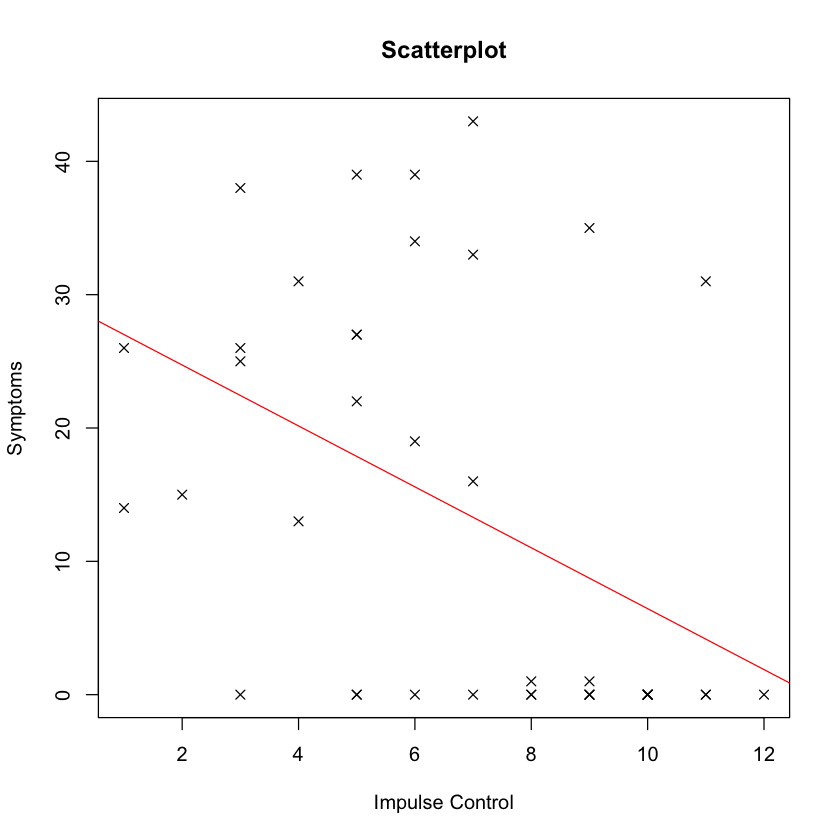

In [48]:
##manual compute of B_0 and B1 for variables impact$sym2 and impact$ic2
# impact$ic2 is independent variable (feature)
#impact$sym2 is dependent variable ( response)
mean_sym2 <- mean(impact$sym2)
mean_ic2 <- mean(impact$ic2)
sd_sym2 <- sd(impact$sym2)
sd_ic2 <- sd(impact$ic2)
r <- cor(impact$ic2,impact$sym2)

# Calculate the slope
B_1 <- r * (sd_sym2 )/( sd_ic2 )

# Calculate the intercept
B_0 <- mean_sym2 - B_1 * mean_ic2

# Plot of ic2 against sym2
plot(impact$ic2, impact$sym2, main = "Scatterplot", ylab = "Symptoms", xlab = "Impulse Control", pch=4)

# Add the regression line
abline(B_0, B_1, col = "red")

In [49]:
##using R lm()for same varialbes
model_1 <- lm(impact$sym2 ~ impact$ic2)
print(summary(model_1)) # check that coefficients are the same


Call:
lm(formula = impact$sym2 ~ impact$ic2)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.441  -8.983  -5.309   9.127  29.696 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.2945     5.5090   5.318  4.9e-06 ***
impact$ic2   -2.2844     0.7483  -3.053  0.00413 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.91 on 38 degrees of freedom
Multiple R-squared:  0.1969,	Adjusted R-squared:  0.1758 
F-statistic: 9.319 on 1 and 38 DF,  p-value: 0.004125



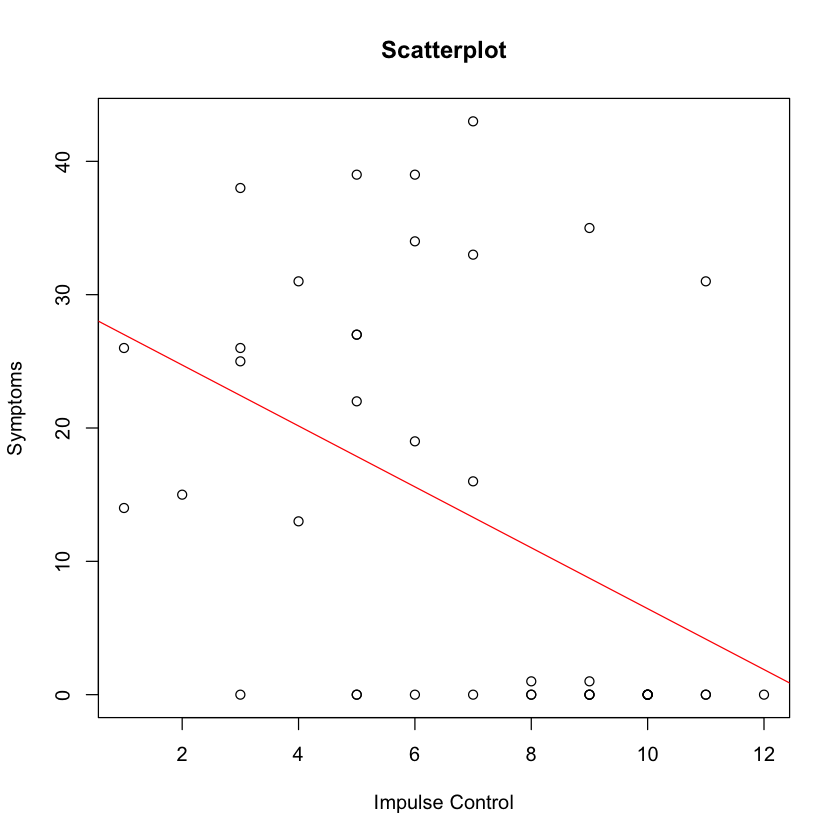

In [50]:
#making the same plot
plot(impact$sym2 ~ impact$ic2, main = "Scatterplot", ylab = "Symptoms", xlab = "Impulse Control")
# Add a regression line
abline(model_1, col = "red")

In [51]:
## order 2 linear regression
model_2 <- lm(impact$sym2 ~ impact$ic2 + impact$vermem2)
summary(model_2) # obser an increase of R squared


Call:
lm(formula = impact$sym2 ~ impact$ic2 + impact$vermem2)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.274  -8.031  -2.703   6.245  27.962 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     79.7639    14.7765   5.398  4.1e-06 ***
impact$ic2      -1.0711     0.7335  -1.460 0.152690    
impact$vermem2  -0.7154     0.1981  -3.611 0.000898 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.12 on 37 degrees of freedom
Multiple R-squared:  0.4062,	Adjusted R-squared:  0.3742 
F-statistic: 12.66 on 2 and 37 DF,  p-value: 6.482e-05


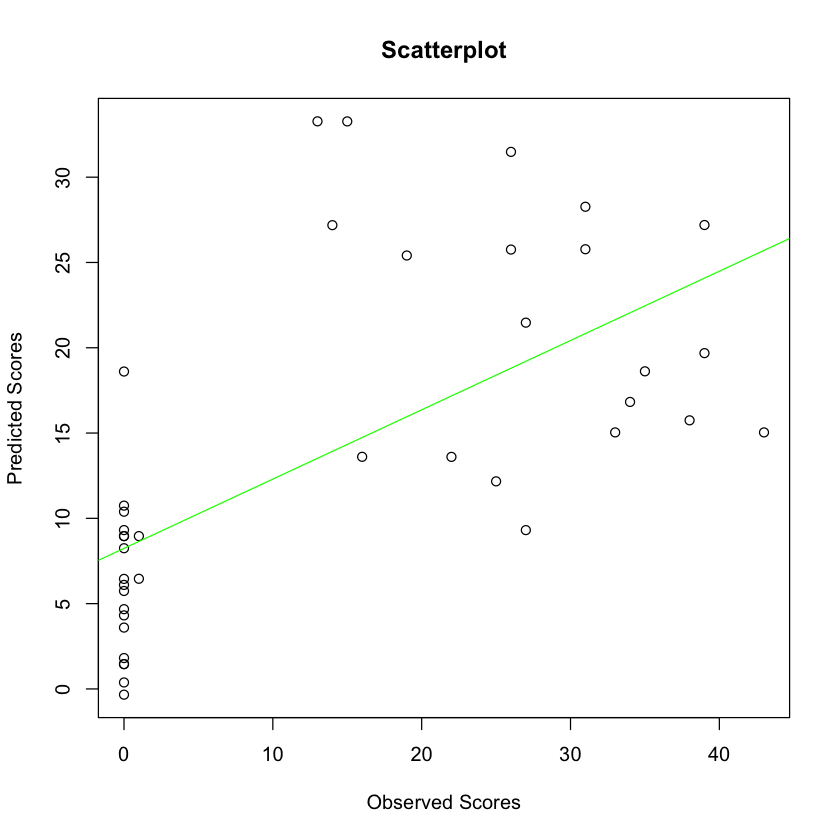

In [52]:
# Plot predicted scores against observed scores
predicted <- fitted(model_2)
plot(predicted ~ impact$sym2, main = "Scatterplot", xlab = "Observed Scores", ylab = "Predicted Scores")
abline(lm(predicted ~impact$sym2),col = "green")

### assumptions of linear regression
* Normal distribution of Y
* linear relationship betwen X and Y 
* Homoscedacity


* Reliability of X and Y 
* Validity of X and Y 
* true random sample of population

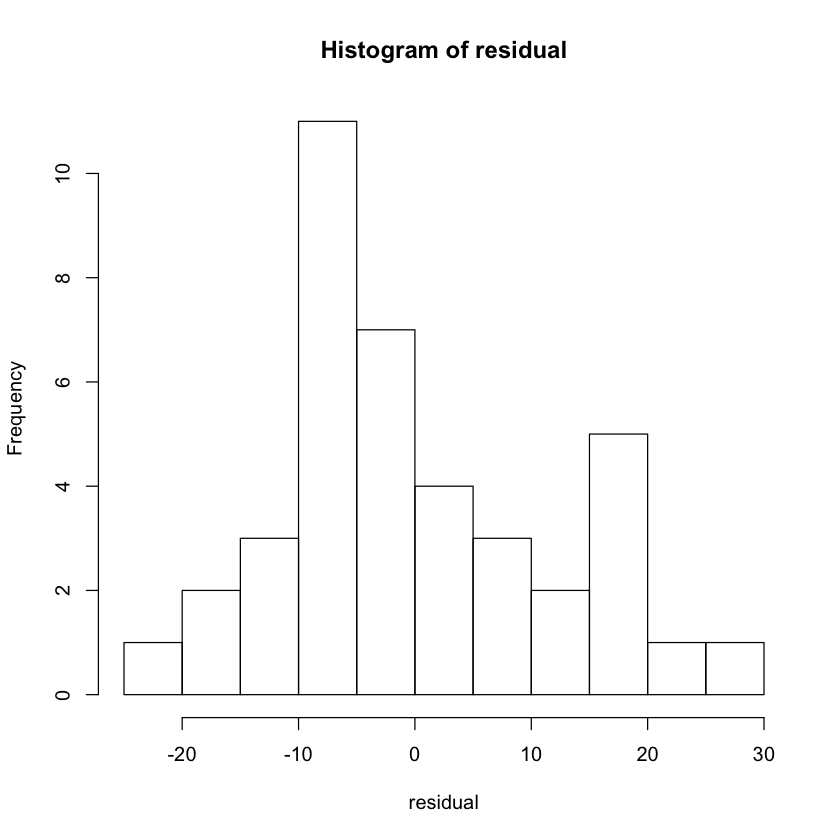

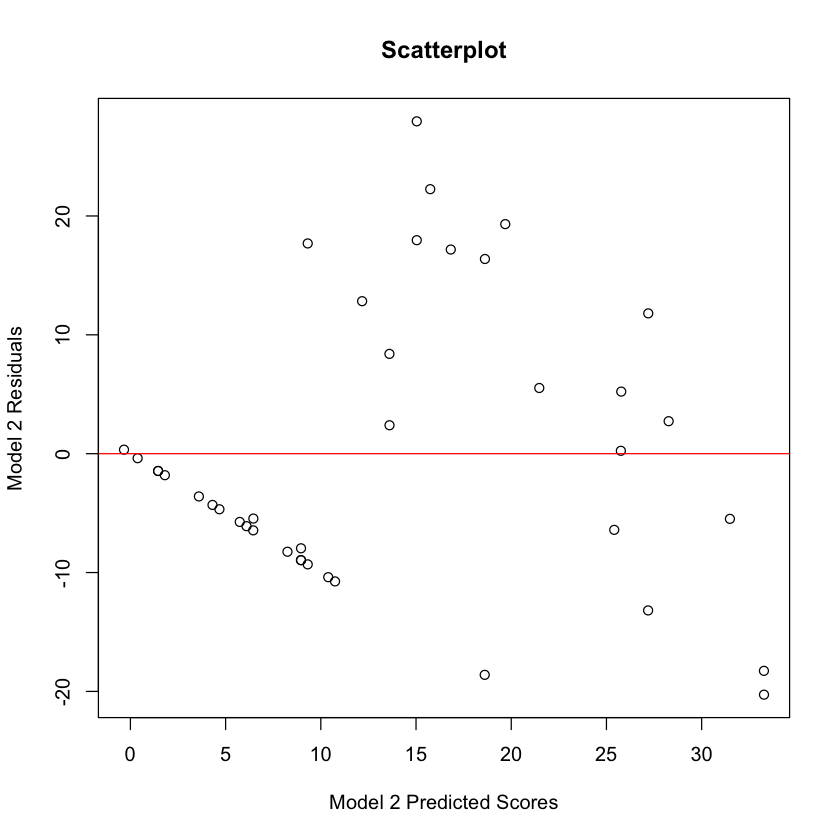

In [53]:
##plotting residuals of model_2
residual <- resid(model_2)
# Draw a histogram of the residuals
hist(residual)

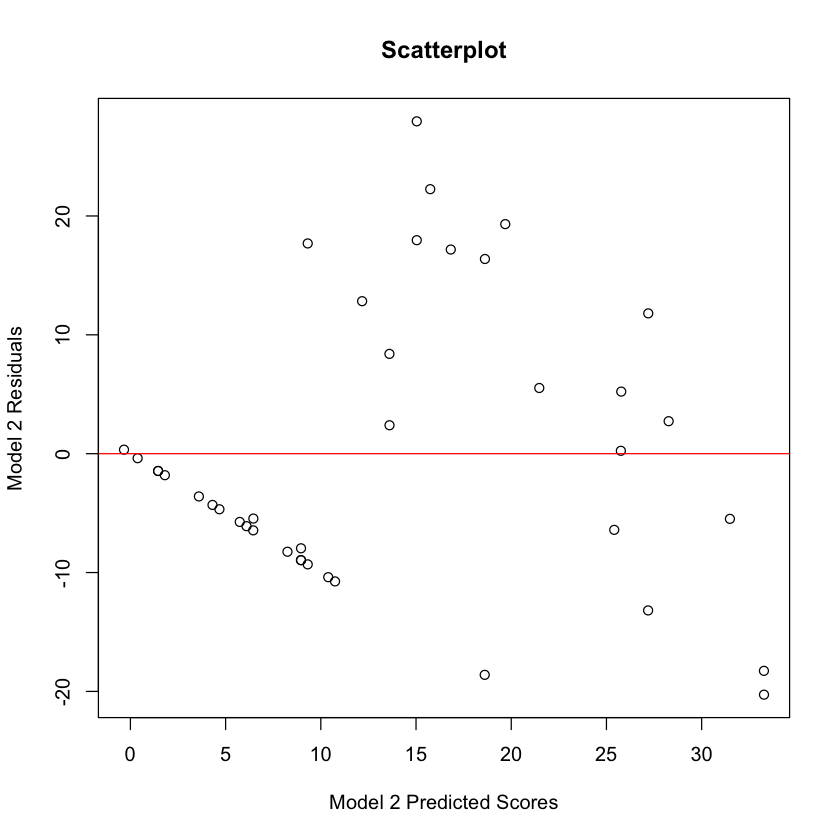

In [54]:
predicted <- fitted(model_2)
# Plot the residuals against the predicted symptom scores
plot(residual ~ predicted, main = "Scatterplot"
     ,xlab="Model 2 Predicted Scores", ylab="Model 2 Residuals" )
abline(lm(residual~predicted),col="red")

By looking at the plot above we observe that residuals are not randomly distributed. ie. the predictor variable vs response violates homoscedacity